# Hotspots

Hotspots California map: 
- Wildifre-wildifreSmokePM2.5, 
- Heat-wildfire,
- Heat-PM2.5, 
- Wildifre-Heat-SmokePM2.5P

In [21]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
df = pd.read_parquet("outputs/final_merge_5.parquet")

In [23]:
#df["temp"] = (df["tmax"]+df["tmin"])/2

In [26]:
df = df.drop(columns = ['FIPS_1', 'pm25', 'rhum'])

In [7]:
cluster_variables = ['tmax', 'tmin', 'rhum', 'wfday', 'pm25', 'smoke_pm']

In [30]:
pivot_df = df.pivot(index='GEOID', columns='time')

In [32]:
pivot_df

tmax                                                         \
time       2006-01-01 2006-01-02 2006-01-03 2006-01-04 2006-01-05 2006-01-06   
GEOID                                                                          
6001400100  11.149988  14.350000  16.050013  17.050013  17.850000  13.950006   
6001400200  13.350000  15.550013  17.149988  17.749994  18.350000  15.149988   
6001400300  13.350000  15.550013  17.149988  17.749994  18.350000  15.149988   
6001400400  13.350000  15.550013  17.149988  17.749994  18.350000  15.149988   
6001400500  13.350000  15.550013  17.149988  17.749994  18.350000  15.149988   
...               ...        ...        ...        ...        ...        ...   
6115040902  13.149988  14.249994  16.550013  18.050013  18.450006  15.850000   
6115041001  12.249994  15.050013  21.749994  24.350000  24.450006  19.649988   
6115041002  13.850000  16.649988  23.350000  26.050013  26.050013  21.249994   
6115041101  10.799997  13.549997  20.250010  22.949991  22.949991  18.200006   
6115041102  13.749994  16.450006  22.450006  26.050013  25.850000  20.950006   

                                                        ...   smoke_pm  \
time       2006-01-07 2006-01-08 2006-01-09 2006-01-10  ... 2020-12-22   
GEOID                                                   ...              
6001400100  13.249994  13.550013  14.149988  15.050013  ...        0.0   
6001400200  14.649988  14.950006  15.050013  16.249994  ...        0.0   
6001400300  14.649988  14.950006  15.050013  16.249994  ...        0.0   
6001400400  14.649988  14.950006  15.050013  16.249994  ...        0.0   
6001400500  14.649988  14.950006  15.050013  16.249994  ...        0.0   
...               ...        ...        ...        ...  ...        ...   
6115040902  13.950006  13.950006  14.550013  15.649988  ...        0.0   
6115041001  20.550013  19.149988  19.450006  20.350000  ...        0.0   
6115041002  22.149988  20.749994  21.149988  21.950006  ...        0.0   
6115041101  19.100000  17.700006  18.049997  18.850000  ...        0.0   
6115041102  22.149988  20.749994  20.550013  21.550013  ...        0.0   

                                                                              \
time       2020-12-23 2020-12-24 2020-12-25 2020-12-26 2020-12-27 2020-12-28   
GEOID                                                                          
6001400100        0.0        0.0        0.0        0.0        0.0        0.0   
6001400200        0.0        0.0        0.0        0.0        0.0        0.0   
6001400300        0.0        0.0        0.0        0.0        0.0        0.0   
6001400400        0.0        0.0        0.0        0.0        0.0        0.0   
6001400500        0.0        0.0        0.0        0.0        0.0        0.0   
...               ...        ...        ...        ...        ...        ...   
6115040902        0.0        0.0        0.0        0.0        0.0        0.0   
6115041001        0.0        0.0        0.0        0.0        0.0        0.0   
6115041002        0.0        0.0        0.0        0.0        0.0        0.0   
6115041101        0.0        0.0        0.0        0.0        0.0        0.0   
6115041102        0.0        0.0        0.0        0.0        0.0        0.0   

                                             
time       2020-12-29 2020-12-30 2020-12-31  
GEOID                                        
6001400100        0.0        0.0        0.0  
6001400200        0.0        0.0        0.0  
6001400300        0.0        0.0        0.0  
6001400400        0.0        0.0        0.0  
6001400500        0.0        0.0        0.0  
...               ...        ...        ...  
6115040902        0.0        0.0        0.0  
6115041001        0.0        0.0        0.0  
6115041002        0.0        0.0        0.0  
6115041101        0.0        0.0        0.0  
6115041102        0.0        0.0        0.0  

[8673 rows x 21636 columns]

In [34]:
pivot_df.index

Index([6001400100, 6001400200, 6001400300, 6001400400, 6001400500, 6001400600,
       6001400700, 6001400800, 6001400900, 6001401000,
       ...
       6115040600, 6115040701, 6115040702, 6115040800, 6115040901, 6115040902,
       6115041001, 6115041002, 6115041101, 6115041102],
      dtype='int64', name='GEOID', length=8673)

In [12]:
#df = df.dropna()

In [57]:
np.random.seed(1234)

In [ ]:
gdf = gpd.read_file("data/esri/FIPSMapping.gdb")
gdf["FIPS_1"] = gdf.FIPS_1.astype(int)

In [72]:
results = []
results.append(list(pivot_df.index))
labels = []
labels.append("GEOID")
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    k5cls = kmeans.fit(pivot_df)

    labels.append(f"k{ n_clusters }cls")
    results.append(k5cls.labels_)

/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ant746/PycharmProjects/kate/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [73]:
res = pd.DataFrame(np.stack(results, axis=1), columns=labels)

In [74]:
res.head()

,GEOID,k2cls,k3cls,k4cls,k5cls,k6cls,k7cls,k8cls,k9cls
0,6001400100,0,0,3,4,2,1,1,3
1,6001400200,0,0,3,4,2,1,1,3
2,6001400300,0,0,3,4,2,1,1,3
3,6001400400,0,0,3,4,2,1,1,3
4,6001400500,0,0,3,4,2,1,1,3


In [75]:
merged = gdf.merge(res, left_on="FIPS_1", right_on="GEOID")

In [82]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

<Figure size 800x600 with 0 Axes>

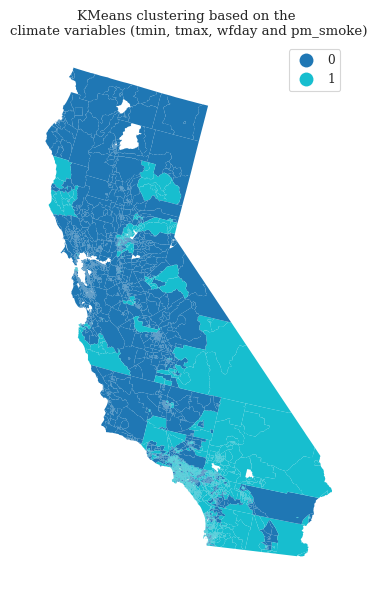

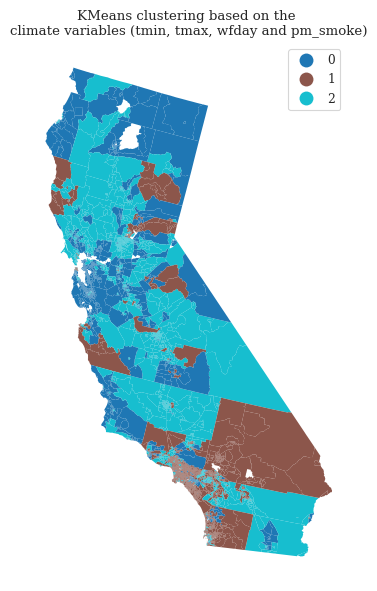

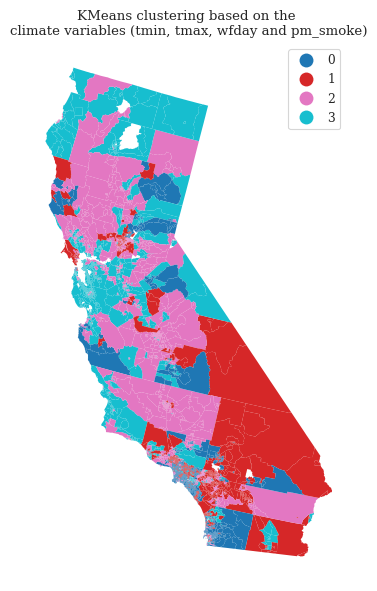

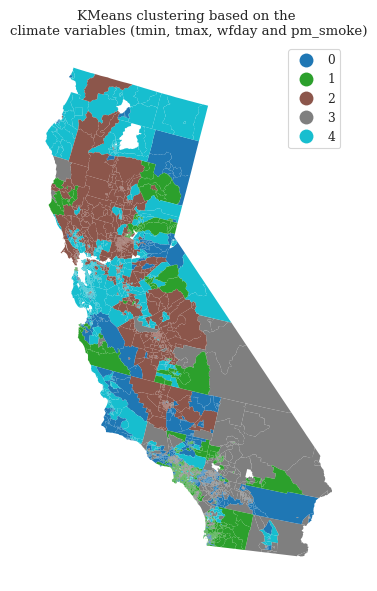

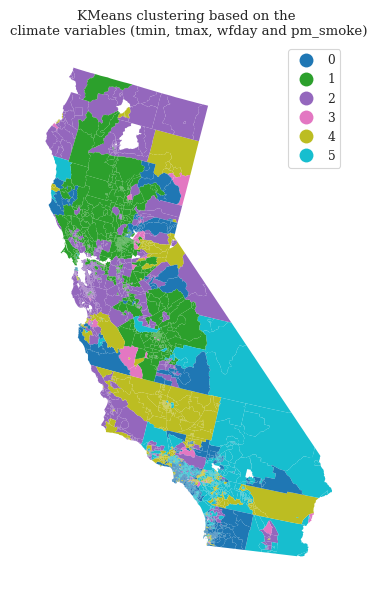

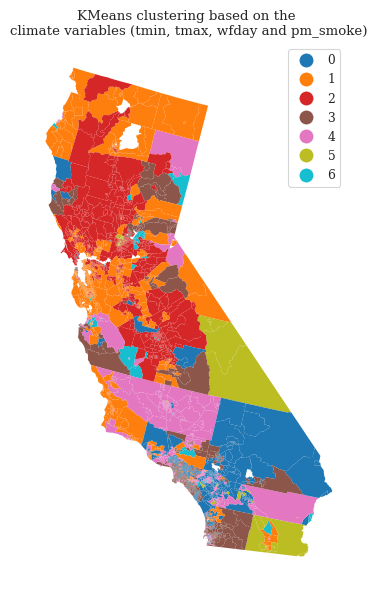

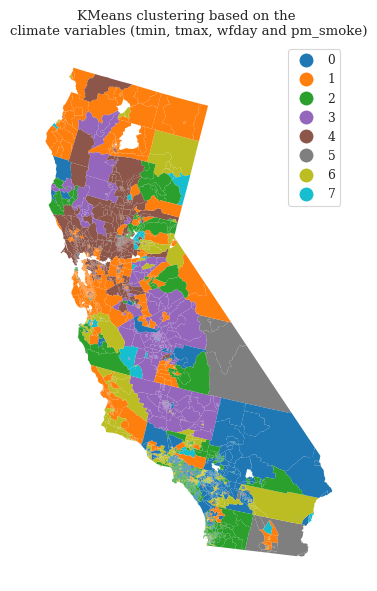

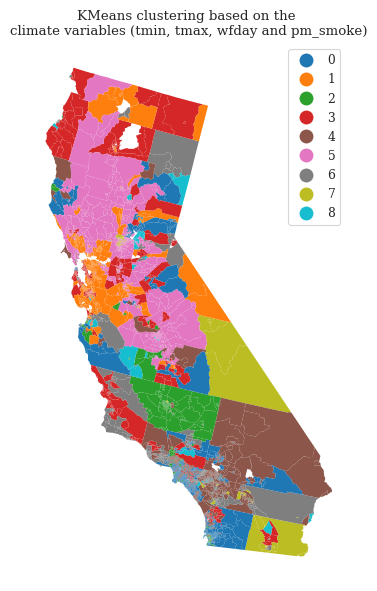

In [84]:
for col in res.columns[1:]:
    # Set up figure and ax
    f, ax = plt.subplots(1, figsize=(6, 6))
    # Plot unique values choropleth including
    # a legend and with no boundary lines
    merged.plot(
        column=col, categorical=True, legend=True, linewidth=0, ax=ax
    )
    # Remove axis
    ax.set_axis_off()
    ax.set_title("KMeans clustering based on the \nclimate variables (tmin, tmax, wfday and pm_smoke)")
    plt.tight_layout()
    plt.savefig("figures/kmeans_" + col + ".png")
    # Display the map
    plt.show()

    

In [55]:
# Group data table by cluster label and count observations
k5sizes = merged.groupby("k5cls").size()
k5sizes

k5cls
0    2004
1    1818
2    1075
3    2311
4    1465
dtype: int64